In [5]:
# import library
import numpy as np
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt

In [7]:
# 빅카인즈에서 '4차산업혁명 관광'이 언급된 기사
df = pd.read_csv('data/NewsResult_20210418-20210718 (1).csv',
                 index_col='일자', parse_dates=True)
df.head(1)

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부
일자,,,,,,,,,,,,,,,,,,
2021-07-16,2.100801e+06,아시아경제,영남취재본부 최순경,산청 2030 미래비전 연구용역 2차 중간보고회 개최,지역>충남,지역>강원,지역>전북,NaN,NaN,NaN,"심재화,이재근","산청,지리산,경남,산청군,영남","산청군의회,(재)한국산업개발연구원,충전소,산청군","산청,미래비전,용역,중간,보고회,개최,관광,벨트,활성,항노화,의료,의견수렴,경남,산...","산청,연구용역,항노화,이재근,중간보고회,항노,산청군의회,심재화,보고회,영남,영남취재...",[아시아경제 영남취재본부 최순경 기자] 경남 산청군의 미래 먹거리를 발굴하기 위해 ...,https://www.asiae.co.kr/article/20210716145018...,NaN


In [8]:
import re

# 텍스트 정제 함수
def text_cleaning(text):
    txt = re.compile('[^ ㄱ-ㅣ가-힣a-zA-Z]+')
    result = txt.sub('', text)
    return result

In [9]:
# '제목 키워드' 피처에 이를 적용
df['title key'] = df['제목'].apply(lambda x:text_cleaning(x))
df.head()

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,title key
일자,,,,,,,,,,,,,,,,,,,
2021-07-16,2.100801e+06,아시아경제,영남취재본부 최순경,산청 2030 미래비전 연구용역 2차 중간보고회 개최,지역>충남,지역>강원,지역>전북,NaN,NaN,NaN,"심재화,이재근","산청,지리산,경남,산청군,영남","산청군의회,(재)한국산업개발연구원,충전소,산청군","산청,미래비전,용역,중간,보고회,개최,관광,벨트,활성,항노화,의료,의견수렴,경남,산...","산청,연구용역,항노화,이재근,중간보고회,항노,산청군의회,심재화,보고회,영남,영남취재...",[아시아경제 영남취재본부 최순경 기자] 경남 산청군의 미래 먹거리를 발굴하기 위해 ...,https://www.asiae.co.kr/article/20210716145018...,NaN,산청 미래비전 연구용역 차 중간보고회 개최
2021-07-16,1.300101e+06,강원도민일보,조인묵,민선7기 4년을 맞이하며,지역>전북,지역>충남,지역>경기,NaN,NaN,NaN,"박수근,이건희","우호,주문도,박수근미술관,민선7기,봉화산,부서장,민선6기,펀치볼,강원도,대한민국,선...","삼성그룹,양구,정부,SOC,농림어업특별위원회,국회,농민수,양구군","민선,지방,자치,전쟁,나라,원조,최빈국,경제대국,세계,경제,대국,성장,선진국,초청,...","박수근미술관,민선7기,지방자치,근로자,양구군,민주주의,선진국,방송국,이건희,펀치볼,...","지방자치 30년, 6ㆍ25전쟁 71년이 되었다. 다른 나라의 원조를 받던 최빈국에서...",www.kado.net/news/articleView.html?idxno=1083062,NaN,민선기 년을 맞이하며
2021-07-16,1.200101e+06,경기일보,이민우 기자,"인천시 인천관광공사, 관광스타트업 관광인재 육성 본격화",미분류,NaN,NaN,NaN,NaN,NaN,민민홍,"인천,인천시","인천관광공사,아카데미,종사원,스타트업 아카데미,관광공사,인천","인천시,인천관광공사,관광스타트업,관광인재,육성,본격화,인천시,인천관광공사,지역,관광...","관광공사,인천,관광스타트업,스타트업,다음달,관광인재,참가자,종사원,사업자,전문가,민민홍",인천시와 인천관광공사가 지역 내 관광 분야의 스타트업과 인재 육성을 본격화한다. \...,www.kyeonggi.com/news/articleView.html?idxno=2...,NaN,인천시 인천관광공사 관광스타트업 관광인재 육성 본격화
2021-07-15,1.601001e+06,전북도민일보,권순재 기자,[새만금 대토론회] 새로운 30년 새 시대 준비에 대한 고찰,지역>경남,지역>대전,지역>전북,NaN,NaN,NaN,"이원택,송재복,최정우,김태형","수변,항만,아젠다,전북지사,두바이,새만금","정부,국가균형발전위원회,청와대,한국교통연구원,한국관광공사,SOC,목원대학교,두바이,...","30년,시대,준비,고찰,이원택,국회의원,새만금,10년,변곡점,공항,항만,2025년,...","새만금,모빌리티,친환경,수변도시,두바이,수변,새만금개발공사,스마트수변도시,목원대학교...",이원택 국회의원= \n\n앞으로의 새만금이 갈 10년 안에 변곡점이 생길 것이라 본...,http://www.domin.co.kr/news/articleView.html?i...,NaN,새만금 대토론회 새로운 년 새 시대 준비에 대한 고찰
2021-07-15,1.600201e+06,광주매일신문,최권범 기자,최일 동신대 총장 “공유경제 플랫폼 구축 지역발전 이끌겠다”,지역>대전,지역>경기,지역>충남,NaN,NaN,NaN,최일,"초월,나주시,신산,서남권,전남,광주","메이커 스페이스,동신대학교,동신대,정부,유일,IPP,혁신선도대학,선도대학","지역발전,최일,동신대,총장,공유,경제,플랫폼,구축,지역,공유,경제,플랫폼,구축,지역...","장학금,등록금,이차전지,일자리,동신대,1천,최일,6천,전남,광주",“지역 공유경제 플랫폼 구축 등을 통해 지역 사회의 새로운 성장 발전 모델을 만들어...,http://www.kjdaily.com/news_view.php?n=551393&...,NaN,최일 동신대 총장 공유경제 플랫폼 구축 지역발전 이끌겠다


In [10]:
# 장바구니 만들어주기
f = df['키워드']
nouns = []
for i in range(len(f)):
    nouns.append(f[i].split(','))
    
for i in range(len(nouns)):
    if '' in nouns[i]:
        nouns[i].remove('')

df['명사'] = nouns

In [11]:
df.head()

,뉴스 식별자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건/사고 분류1,사건/사고 분류2,사건/사고 분류3,인물,위치,기관,키워드,특성추출(가중치순 상위 50개),본문,URL,분석제외 여부,title key,명사
일자,,,,,,,,,,,,,,,,,,,,
2021-07-16,2.100801e+06,아시아경제,영남취재본부 최순경,산청 2030 미래비전 연구용역 2차 중간보고회 개최,지역>충남,지역>강원,지역>전북,NaN,NaN,NaN,"심재화,이재근","산청,지리산,경남,산청군,영남","산청군의회,(재)한국산업개발연구원,충전소,산청군","산청,미래비전,용역,중간,보고회,개최,관광,벨트,활성,항노화,의료,의견수렴,경남,산...","산청,연구용역,항노화,이재근,중간보고회,항노,산청군의회,심재화,보고회,영남,영남취재...",[아시아경제 영남취재본부 최순경 기자] 경남 산청군의 미래 먹거리를 발굴하기 위해 ...,https://www.asiae.co.kr/article/20210716145018...,NaN,산청 미래비전 연구용역 차 중간보고회 개최,"[산청, 미래비전, 용역, 중간, 보고회, 개최, 관광, 벨트, 활성, 항노화, 의..."
2021-07-16,1.300101e+06,강원도민일보,조인묵,민선7기 4년을 맞이하며,지역>전북,지역>충남,지역>경기,NaN,NaN,NaN,"박수근,이건희","우호,주문도,박수근미술관,민선7기,봉화산,부서장,민선6기,펀치볼,강원도,대한민국,선...","삼성그룹,양구,정부,SOC,농림어업특별위원회,국회,농민수,양구군","민선,지방,자치,전쟁,나라,원조,최빈국,경제대국,세계,경제,대국,성장,선진국,초청,...","박수근미술관,민선7기,지방자치,근로자,양구군,민주주의,선진국,방송국,이건희,펀치볼,...","지방자치 30년, 6ㆍ25전쟁 71년이 되었다. 다른 나라의 원조를 받던 최빈국에서...",www.kado.net/news/articleView.html?idxno=1083062,NaN,민선기 년을 맞이하며,"[민선, 지방, 자치, 전쟁, 나라, 원조, 최빈국, 경제대국, 세계, 경제, 대국..."
2021-07-16,1.200101e+06,경기일보,이민우 기자,"인천시 인천관광공사, 관광스타트업 관광인재 육성 본격화",미분류,NaN,NaN,NaN,NaN,NaN,민민홍,"인천,인천시","인천관광공사,아카데미,종사원,스타트업 아카데미,관광공사,인천","인천시,인천관광공사,관광스타트업,관광인재,육성,본격화,인천시,인천관광공사,지역,관광...","관광공사,인천,관광스타트업,스타트업,다음달,관광인재,참가자,종사원,사업자,전문가,민민홍",인천시와 인천관광공사가 지역 내 관광 분야의 스타트업과 인재 육성을 본격화한다. \...,www.kyeonggi.com/news/articleView.html?idxno=2...,NaN,인천시 인천관광공사 관광스타트업 관광인재 육성 본격화,"[인천시, 인천관광공사, 관광스타트업, 관광인재, 육성, 본격화, 인천시, 인천관광..."
2021-07-15,1.601001e+06,전북도민일보,권순재 기자,[새만금 대토론회] 새로운 30년 새 시대 준비에 대한 고찰,지역>경남,지역>대전,지역>전북,NaN,NaN,NaN,"이원택,송재복,최정우,김태형","수변,항만,아젠다,전북지사,두바이,새만금","정부,국가균형발전위원회,청와대,한국교통연구원,한국관광공사,SOC,목원대학교,두바이,...","30년,시대,준비,고찰,이원택,국회의원,새만금,10년,변곡점,공항,항만,2025년,...","새만금,모빌리티,친환경,수변도시,두바이,수변,새만금개발공사,스마트수변도시,목원대학교...",이원택 국회의원= \n\n앞으로의 새만금이 갈 10년 안에 변곡점이 생길 것이라 본...,http://www.domin.co.kr/news/articleView.html?i...,NaN,새만금 대토론회 새로운 년 새 시대 준비에 대한 고찰,"[30년, 시대, 준비, 고찰, 이원택, 국회의원, 새만금, 10년, 변곡점, 공항..."
2021-07-15,1.600201e+06,광주매일신문,최권범 기자,최일 동신대 총장 “공유경제 플랫폼 구축 지역발전 이끌겠다”,지역>대전,지역>경기,지역>충남,NaN,NaN,NaN,최일,"초월,나주시,신산,서남권,전남,광주","메이커 스페이스,동신대학교,동신대,정부,유일,IPP,혁신선도대학,선도대학","지역발전,최일,동신대,총장,공유,경제,플랫폼,구축,지역,공유,경제,플랫폼,구축,지역...","장학금,등록금,이차전지,일자리,동신대,1천,최일,6천,전남,광주",“지역 공유경제 플랫폼 구축 등을 통해 지역 사회의 새로운 성장 발전 모델을 만들어...,http://www.kjdaily.com/news_view.php?n=551393&...,NaN,최일 동신대 총장 공유경제 플랫폼 구축 지역발전 이끌겠다,"[지역발전, 최일, 동신대, 총장, 공유, 경제, 플랫폼, 구축, 지역, 공유, 경..."


In [12]:
# 트랜잭션 데이터 추출
transactions = df['명사'].tolist()
print(transactions)

[['산청', '미래비전', '용역', '중간', '보고회', '개최', '관광', '벨트', '활성', '항노화', '의료', '의견수렴', '경남', '산청군', '미래', '먹거리', '발굴', '추진', '종합', '연구용역', '산청', '비전', '중장기', '종합', '발전', '계획', '용역', '순조', '진행', '16일', '전역', '산청', '관광', '벨트', '활성', '산청', '산청', '스마트', '농업인', '양성', '사업', '조성', '국제', '한방', '항노', '웰니스', '의료', '관광', '거점', '특색사업들', '지역', '맞춤', '특색', '사업', '추진', '전망', '15일', '대회의실', '이재근', '산청', '군수', '의장', '심재화', '산청군의회', '과장', '실무추진단', '용역', '수행', '업체', '참석', '중간보고회', '중간', '보고회', '연구용역', '한국산업개발연구원', '용역', '과업', '추진', '로드맵', '계획', '설명', '공무원', '의견', '수렴', '용역', '충전소', '늘품', '산청', '산청', '산청', '비전', '저출산', '고령화', '산업', '혁명', '급변', '대내외', '여건', '선제적', '대응', '전략', '마련', '한편', '차별', '프로젝트', '발굴', '추진', '수렴', '군민', '의견', '설문조사', '주민', '설명회', '지역주민들', '의견', '계획', '반영', '계획', '이재근', '산청', '군수', '최대', '지리산', '한방약초', '바탕', '항노화', '산업', '바탕', '지역', '특성', '반영', '방안', '성장', '촉진', '부가', '가치', '산업', '발굴', '귀농', '귀촌', '유입', '방지', '경제', '활동', '인구', '유출', '트렌드', '미래지향적', '사업', '추진', '미래', '먹거리', '전략', '수립', '최선', '

In [13]:
# 연관분석
from apyori import apriori

In [14]:
results = list(apriori(transactions, min_support=0.5, min_confidnece=0.6, min_lift=1.0, max_length=2))
print(results)

[RelationRecord(items=frozenset({'계획'}), support=0.5223214285714286, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'계획'}), confidence=0.5223214285714286, lift=1.0)]), RelationRecord(items=frozenset({'관광'}), support=0.8348214285714286, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'관광'}), confidence=0.8348214285714286, lift=1.0)]), RelationRecord(items=frozenset({'구축'}), support=0.5491071428571429, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'구축'}), confidence=0.5491071428571429, lift=1.0)]), RelationRecord(items=frozenset({'미래'}), support=0.5223214285714286, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'미래'}), confidence=0.5223214285714286, lift=1.0)]), RelationRecord(items=frozenset({'분야'}), support=0.5223214285714286, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'분야'}), confidence=0.5223214285714286, li

In [15]:
# 데이터 프레임 형태로 정리
columns = ['source', 'target', 'support']
network_df = pd.DataFrame(columns=columns)

for result in results:
    if len(result.items) == 2:
        items = [x for x in result.items]
        row = [items[0], items[1], result.support]
        series = pd.Series(row, index=network_df.columns)
        network_df = network_df.append(series, ignore_index=True)

network_df.head()

,source,target,support
0,계획,산업,0.522321
1,계획,혁명,0.517857
2,사업,관광,0.562500
3,산업,관광,0.834821
4,관광,지역,0.571429


In [16]:
# 말뭉치 추출
f = df["키워드"]
data = []
for i in range(len(f)):
    data.append(f[i].split(','))

In [17]:
a = []
for i in range(len(data)):
    a.append(' '.join(data[i]))

talk = ' '.join(a)

In [18]:
import collections
import itertools

# 단어/개수 딕셔너리
kw_dict = collections.Counter(itertools.chain.from_iterable(k.split(',') for k in df['키워드']))
kw_dict

Counter({'산청': 10,
         '미래비전': 18,
         '용역': 31,
         '중간': 2,
         '보고회': 17,
         '개최': 142,
         '관광': 484,
         '벨트': 15,
         '활성': 117,
         '항노화': 2,
         '의료': 91,
         '의견수렴': 1,
         '경남': 20,
         '산청군': 1,
         '미래': 322,
         '먹거리': 25,
         '발굴': 98,
         '추진': 367,
         '종합': 52,
         '연구용역': 6,
         '비전': 63,
         '중장기': 3,
         '발전': 263,
         '계획': 275,
         '순조': 3,
         '진행': 136,
         '16일': 5,
         '전역': 6,
         '스마트': 170,
         '농업인': 8,
         '양성': 141,
         '사업': 595,
         '조성': 262,
         '국제': 94,
         '한방': 9,
         '항노': 1,
         '웰니스': 18,
         '거점': 52,
         '특색사업들': 1,
         '지역': 514,
         '맞춤': 36,
         '특색': 11,
         '전망': 54,
         '15일': 10,
         '대회의실': 3,
         '이재근': 2,
         '군수': 43,
         '의장': 21,
         '심재화': 1,
         '산청군의회': 1,
         '과장': 7,
         '

In [19]:
# 단어 빈도 점수 추가
node_df = pd.DataFrame(kw_dict.items(), columns=['node', 'nodesize'])
node_df = node_df[node_df['nodesize'] >= 50]
node_df.head()

,node,nodesize
5,개최,142
6,관광,484
8,활성,117
10,의료,91
14,미래,322


In [20]:
import networkx as nx
plt.figure(figsize=(25,25))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

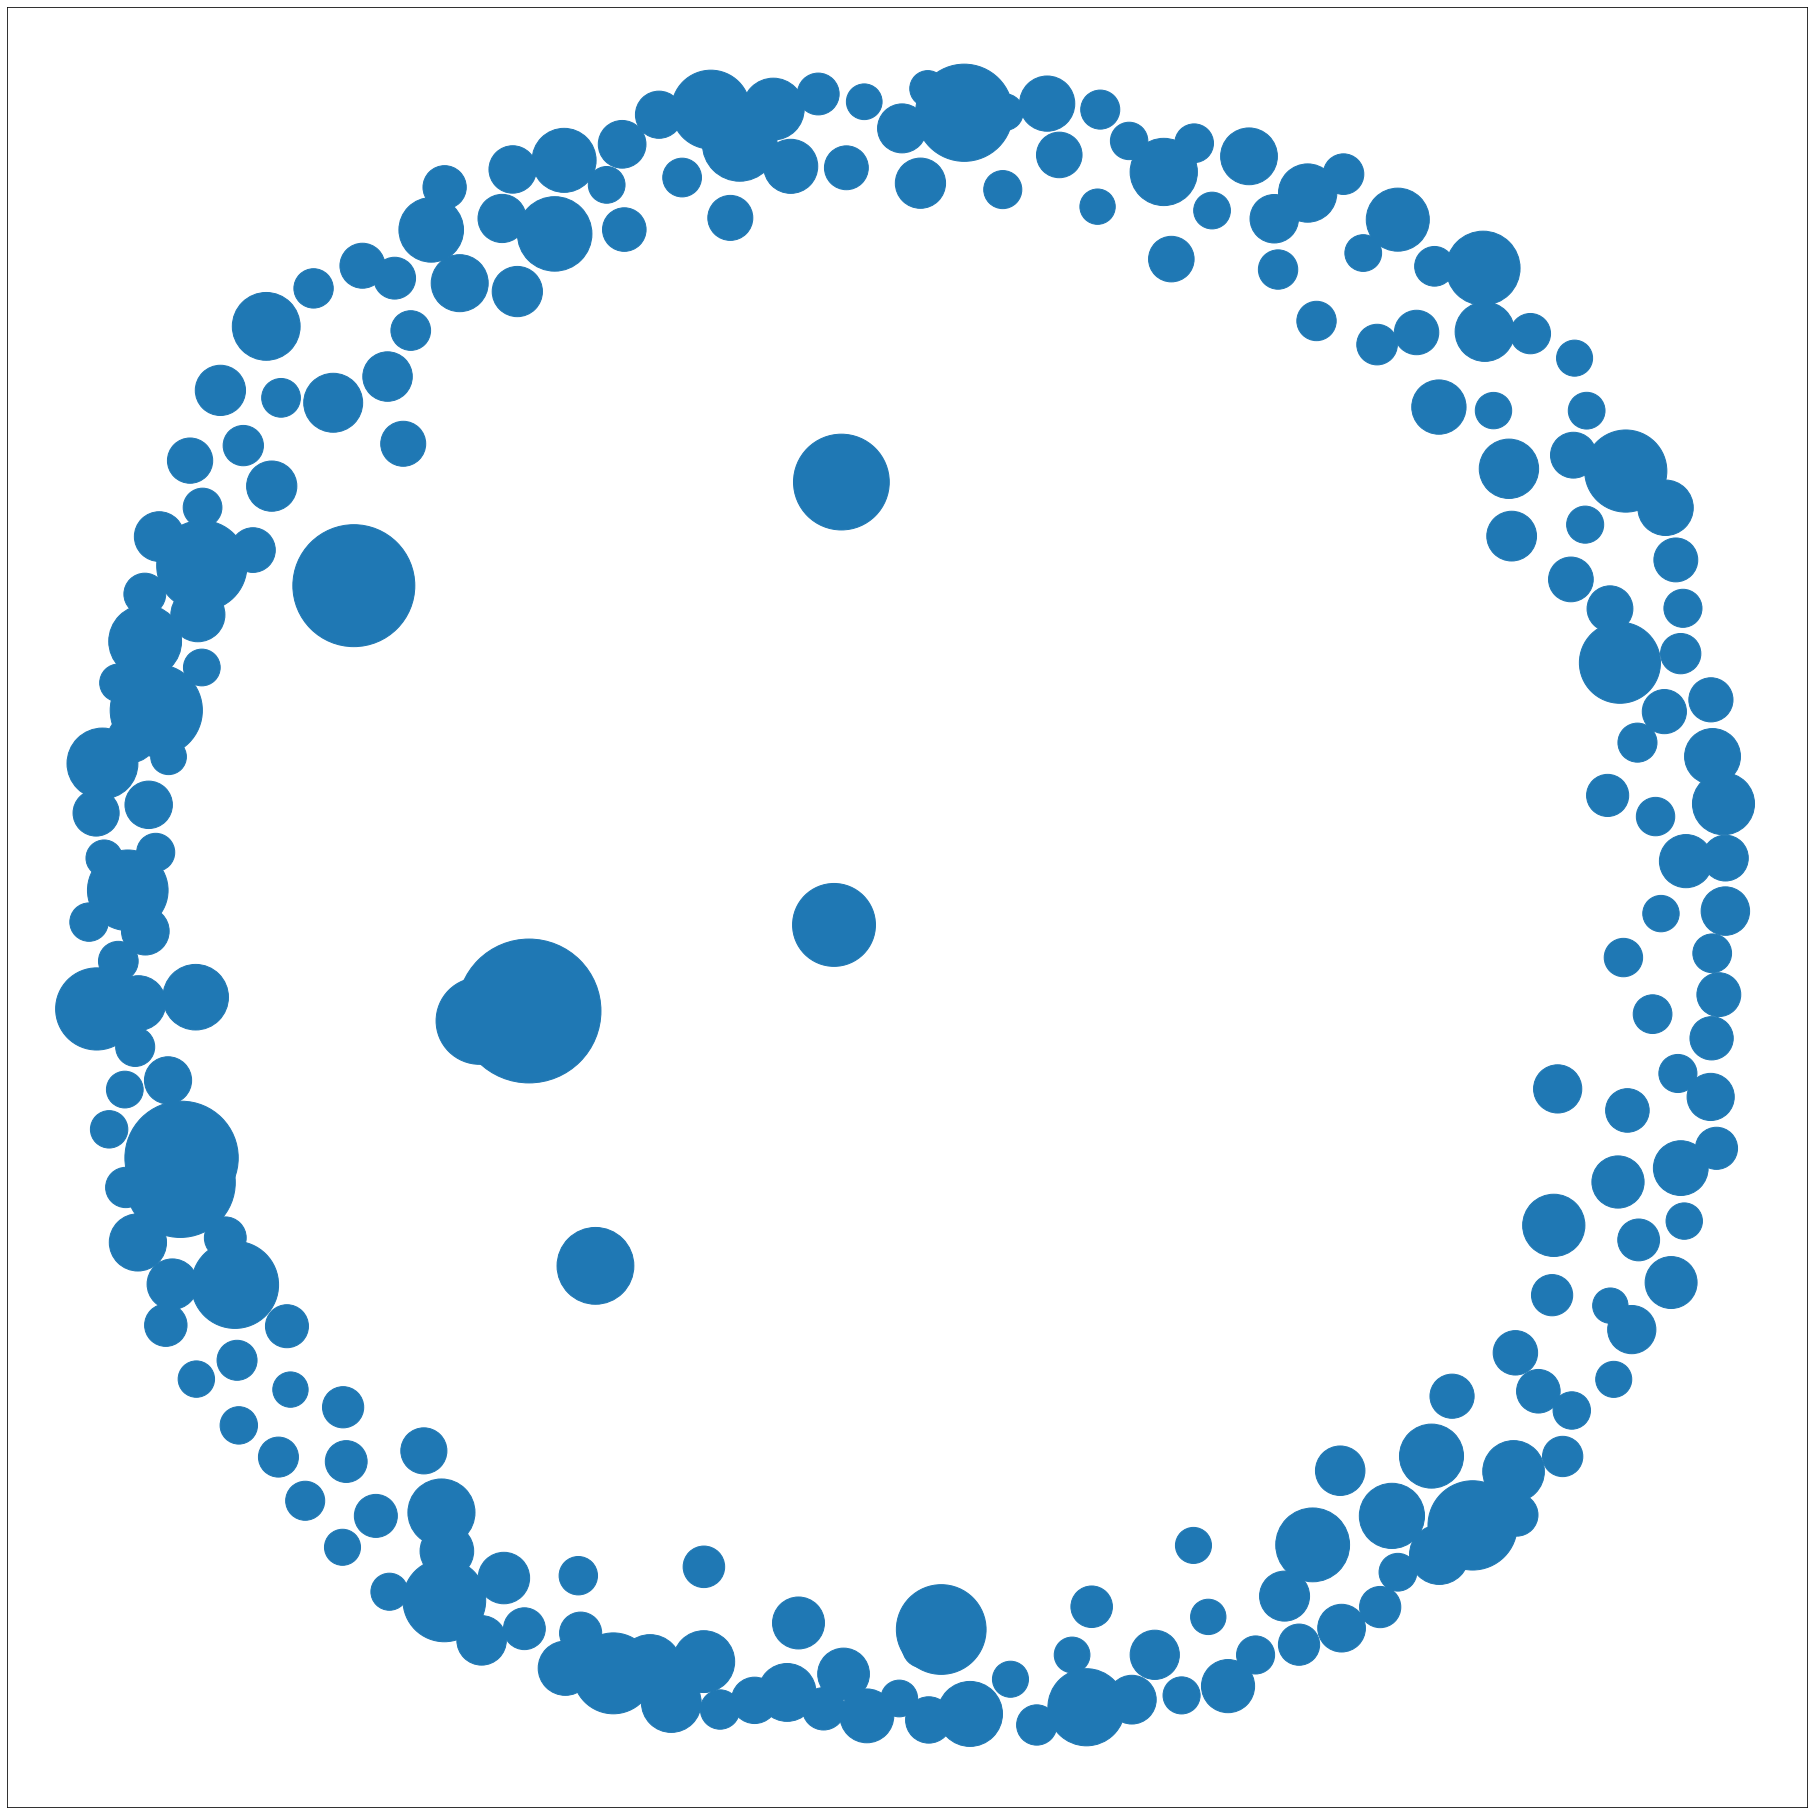

In [22]:
import networkx as nx
plt.figure(figsize=(25,25))

G = nx.Graph()

for index, row in node_df.iterrows():
    G.add_node(row['node'], nodesize=row['nodesize'])
    
for index, row in network_df.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['support'])])
    
pos = nx.spring_layout(G, k=0.6, iterations=50)
sizes = [G.nodes[node]['nodesize']*25 for node in G]
nx.draw(G, pos=pos, node_size=sizes)

nx.draw_networkx_labels(G, pos=pos, font_family='Malgun Gothic', font_size=25)

ax = plt.gca()
plt.show()